# Model Selection and Evaluation
---

## Gradient Boosting Classifier

In [1]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, make_scorer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
#load prepared dataset from notebook
train_features = np.loadtxt('train_features.txt')
train_label = np.loadtxt('train_label.txt')

In [3]:
#load random forest classifier model using one-vs-rest strategy
gbc = GradientBoostingClassifier()

In [4]:
#fit model onto data
gbc.fit(train_features, train_label)

GradientBoostingClassifier()

In [5]:
#make predictions
gbc_predictions = gbc.predict(train_features)

In [6]:
#print classification report
target_names = ['Dead', 'Poor', 'Fair', 'Good']
print(classification_report(train_label, gbc_predictions, target_names = target_names))

              precision    recall  f1-score   support

        Dead       0.99      1.00      0.99      3695
        Poor       0.80      0.01      0.02      2476
        Fair       0.69      0.01      0.02      8702
        Good       0.83      1.00      0.91     53289

    accuracy                           0.84     68162
   macro avg       0.83      0.50      0.48     68162
weighted avg       0.82      0.84      0.77     68162



<AxesSubplot:>

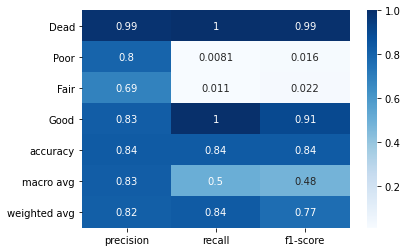

In [7]:
#create heatmap of results
import seaborn as sns
clf_report = classification_report(train_label, gbc_predictions,
                                   target_names=target_names,
                                   zero_division=0,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Blues")

<AxesSubplot:xlabel='label'>

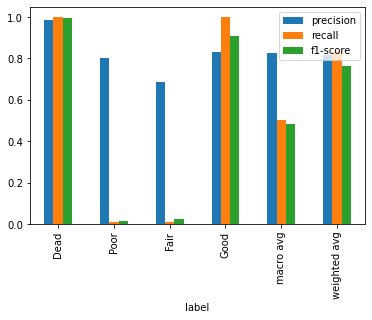

In [8]:
#create bar graph of results
report_data = []
for label, metrics in clf_report.items():
    if label != 'accuracy':
        metrics['label'] = label
        report_data.append(metrics)
report_df = pd.DataFrame(report_data, columns=['label', 'precision', 'recall', 'f1-score', 'support'])
report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')

---

## K-Nearest Neighbors Classifier

In [9]:
#load knn classifier model
knn = KNeighborsClassifier()

In [10]:
#tune hyperparameters using grid search
param_grid = {'n_neighbors': [5, 10], 'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 10, scoring = 'f1_micro')
grid_search.fit(train_features, train_label)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [5, 10]},
             scoring='f1_micro')

In [11]:
#find the best hyperparameters
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 10}

In [12]:
#load new model with correct parameters
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 10)

In [13]:
#fit model onto data
knn.fit(train_features, train_label)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [14]:
#make predictions
knn_predictions = knn.predict(train_features)

In [15]:
#print classification report
print(classification_report(train_label, knn_predictions, target_names = target_names))

              precision    recall  f1-score   support

        Dead       0.99      1.00      0.99      3695
        Poor       0.54      0.06      0.12      2476
        Fair       0.56      0.18      0.27      8702
        Good       0.85      0.98      0.91     53289

    accuracy                           0.85     68162
   macro avg       0.73      0.56      0.57     68162
weighted avg       0.81      0.85      0.80     68162



<AxesSubplot:>

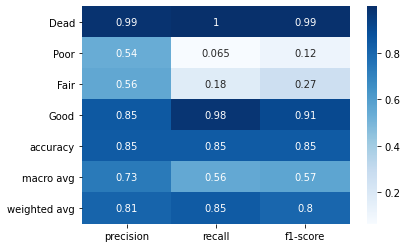

In [16]:
#create heatmap of results
import seaborn as sns
clf_report = classification_report(train_label, knn_predictions,
                                   target_names=target_names,
                                   zero_division=0,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Blues")

<AxesSubplot:xlabel='label'>

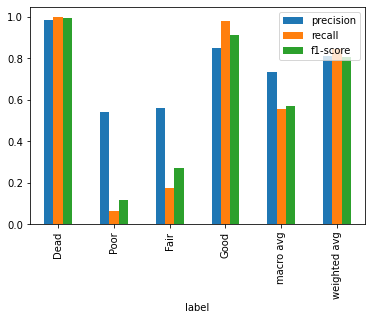

In [17]:
#create bar graph of results
report_data = []
for label, metrics in clf_report.items():
    if label != 'accuracy':
        metrics['label'] = label
        report_data.append(metrics)
report_df = pd.DataFrame(report_data, columns=['label', 'precision', 'recall', 'f1-score', 'support'])
report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')

## Support Vector Machines Classifier

In [18]:
#load svm classifier model
svm = SVC(kernel = 'rbf', decision_function_shape = 'ovr')

In [19]:
#fit model onto data
svm.fit(train_features, train_label)

SVC()

In [20]:
#make predictions
svm_predictions = svm.predict(train_features)

In [21]:
#print classification report
print(classification_report(train_label, svm_predictions, target_names = target_names, zero_division = 0))

              precision    recall  f1-score   support

        Dead       0.99      1.00      0.99      3695
        Poor       0.00      0.00      0.00      2476
        Fair       0.00      0.00      0.00      8702
        Good       0.83      1.00      0.90     53289

    accuracy                           0.84     68162
   macro avg       0.45      0.50      0.47     68162
weighted avg       0.70      0.84      0.76     68162



<AxesSubplot:>

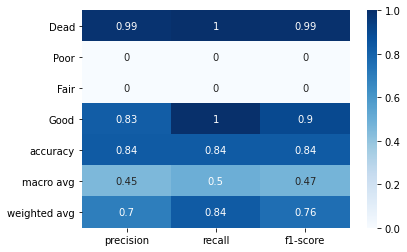

In [22]:
#create heatmap of results
import seaborn as sns
clf_report = classification_report(train_label, svm_predictions,
                                   target_names=target_names,
                                   zero_division = 0,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Blues")

<AxesSubplot:xlabel='label'>

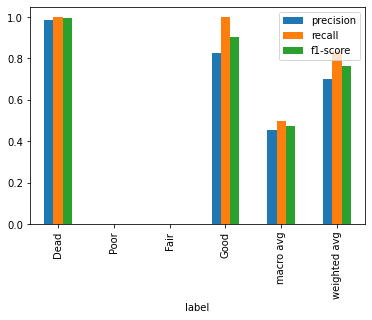

In [23]:
#create bar graph of results
report_data = []
for label, metrics in clf_report.items():
    if label != 'accuracy':
        metrics['label'] = label
        report_data.append(metrics)
report_df = pd.DataFrame(report_data, columns=['label', 'precision', 'recall', 'f1-score', 'support'])
report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')

## Random Forest Classifier

In [24]:
#load rfc classifier model
rfc = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt')

In [25]:
#fit model onto data
rfc.fit(train_features, train_label)

RandomForestClassifier(max_features='sqrt')

In [26]:
#make predictions
rfc_predictions = rfc.predict(train_features)

In [27]:
#intertwine cross validation with classification report
originalclass = []
predictedclass = []
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nested_score = cross_val_score(rfc, X=train_features, y =train_label, cv=5,
                               scoring=make_scorer(classification_report_with_accuracy_score))
print(classification_report(originalclass, predictedclass, target_names = target_names))

              precision    recall  f1-score   support

        Dead       0.99      1.00      0.99      3695
        Poor       0.31      0.11      0.16      2476
        Fair       0.39      0.16      0.23      8702
        Good       0.85      0.96      0.90     53289

    accuracy                           0.83     68162
   macro avg       0.63      0.56      0.57     68162
weighted avg       0.78      0.83      0.79     68162



<AxesSubplot:>

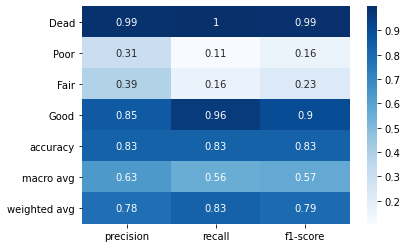

In [28]:
#create heatmap of results
import seaborn as sns
clf_report = classification_report(originalclass, predictedclass,
                                   target_names=target_names,
                                   zero_division=0,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Blues")

<AxesSubplot:xlabel='label'>

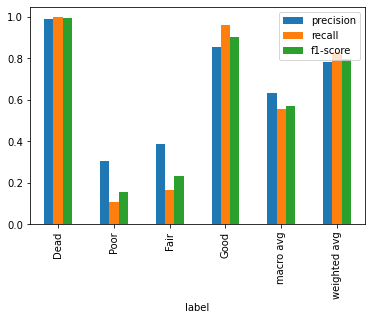

In [29]:
#create bar graph of results
report_data = []
for label, metrics in clf_report.items():
    if label != 'accuracy':
        metrics['label'] = label
        report_data.append(metrics)
report_df = pd.DataFrame(report_data, columns=['label', 'precision', 'recall', 'f1-score', 'support'])
report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')

---

## Scores from Test Set

In [30]:
#use test set
test_features = np.loadtxt('test_features.txt')
test_label = np.loadtxt('test_label.txt')

In [31]:
#predictions with knn classifier with hyperparameter tuning
test_predictions = knn.predict(test_features)

In [32]:
#print classification report
print(classification_report(test_label, test_predictions, target_names = target_names))

              precision    recall  f1-score   support

        Dead       0.99      1.00      0.99       923
        Poor       0.29      0.03      0.06       619
        Fair       0.38      0.12      0.18      2185
        Good       0.84      0.97      0.90     13314

    accuracy                           0.83     17041
   macro avg       0.62      0.53      0.53     17041
weighted avg       0.77      0.83      0.78     17041



<AxesSubplot:>

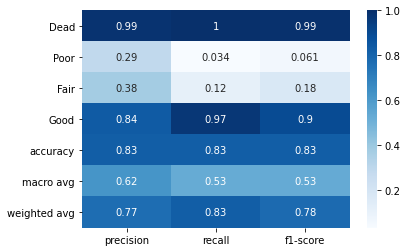

In [33]:
#create heatmap of results
import seaborn as sns
clf_report = classification_report(test_label, test_predictions,
                                   target_names=target_names,
                                   zero_division=0,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Blues")

<AxesSubplot:xlabel='label'>

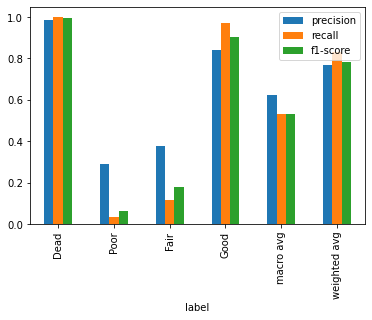

In [34]:
#create bar graph of results
report_data = []
for label, metrics in clf_report.items():
    if label != 'accuracy':
        metrics['label'] = label
        report_data.append(metrics)
report_df = pd.DataFrame(report_data, columns=['label', 'precision', 'recall', 'f1-score', 'support'])
report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')